In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/wines_SPA_cleaned.csv')

In [3]:
# LOADED THE DATASET THAT I CLEANED PREVIOUSLY

In [4]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58.0,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31.0,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793.0,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705.0,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309.0,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [5]:
df.info()        # ENSURING NO MISSING VALUES EXIST BEFORE OUTLIER DETECTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2024 non-null   object 
 1   wine         2024 non-null   object 
 2   year         2024 non-null   object 
 3   rating       2024 non-null   float64
 4   num_reviews  2024 non-null   float64
 5   country      2024 non-null   object 
 6   region       2024 non-null   object 
 7   price        2024 non-null   float64
 8   type         2024 non-null   object 
 9   body         2024 non-null   float64
 10  acidity      2024 non-null   float64
dtypes: float64(5), object(6)
memory usage: 174.1+ KB


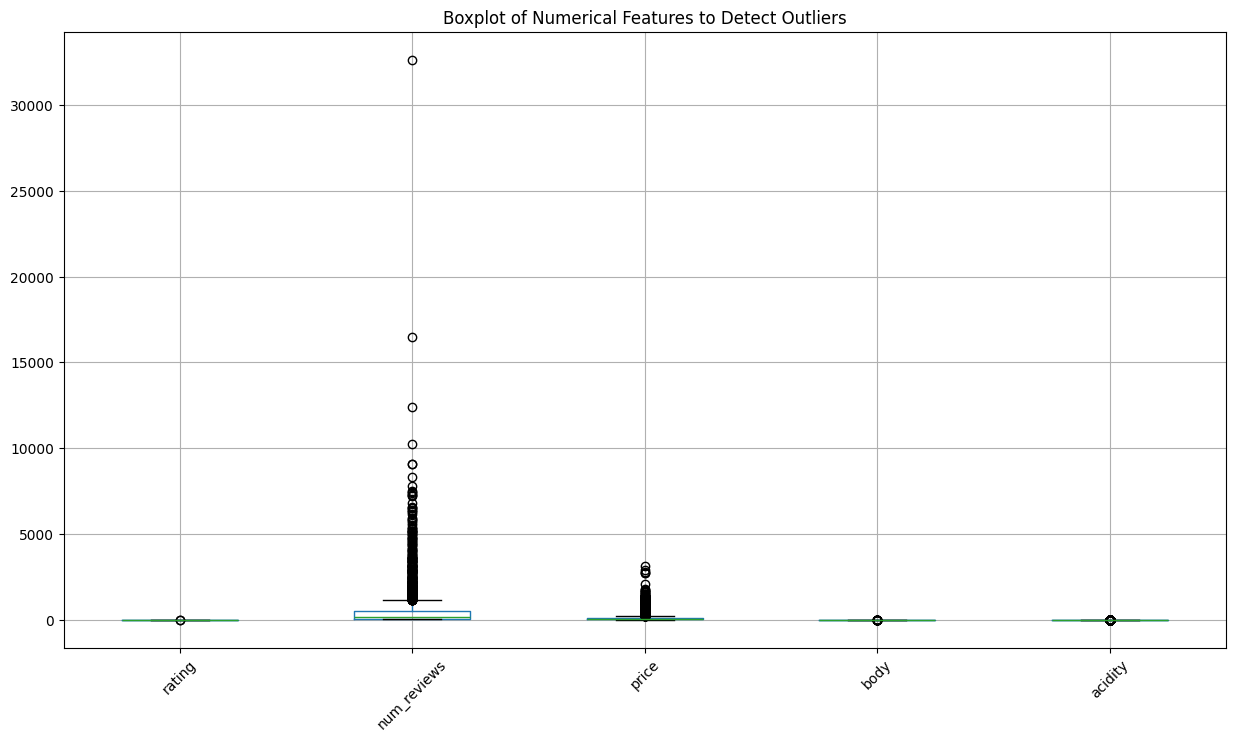

In [6]:
# NOW LET'S GO FOR DETECTING OUTLIERS
num_cols = df.select_dtypes(include=[np.number]).columns     # ONLY NUMERICAL COLUMNS
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features to Detect Outliers")                         # BOXPLOTS
plt.show()

In [7]:
# BOXPLOTS HELP IN SPOTTING EXTREME VALUES THAT GO BEYOND THE WHISKERS (1.5 * IQR RULE)

In [8]:
# USING IQR METHOD (ROBUST AND WORKS WELL FOR SKEWED DISTRIBUTIONS)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
outlier_counts = {col: len(detect_outliers_iqr(df, col)) for col in num_cols}

# OUTLIER COUNT PER COLUMN
outlier_counts


{'rating': 2, 'num_reviews': 240, 'price': 240, 'body': 34, 'acidity': 168}

In [9]:
# APPLIYING IQR-BASED OUTLIER REMOVAL METHOD
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df.reset_index(drop=True)
df_cleaned = remove_outliers(df, num_cols)       # AFTER OUTLIER REMOVAL


In [ ]:
print(f"Original dataset size: {df.shape[0]} rows")
print(f"After outlier removal: {df_cleaned.shape[0]} rows")
print(f"Total outliers removed: {df.shape[0] - df_cleaned.shape[0]} rows")
# CHECKING THE NUMBER OF ROWS REMOVED TO TRACK THE IMPACT OF OUTLIER REMOVAL

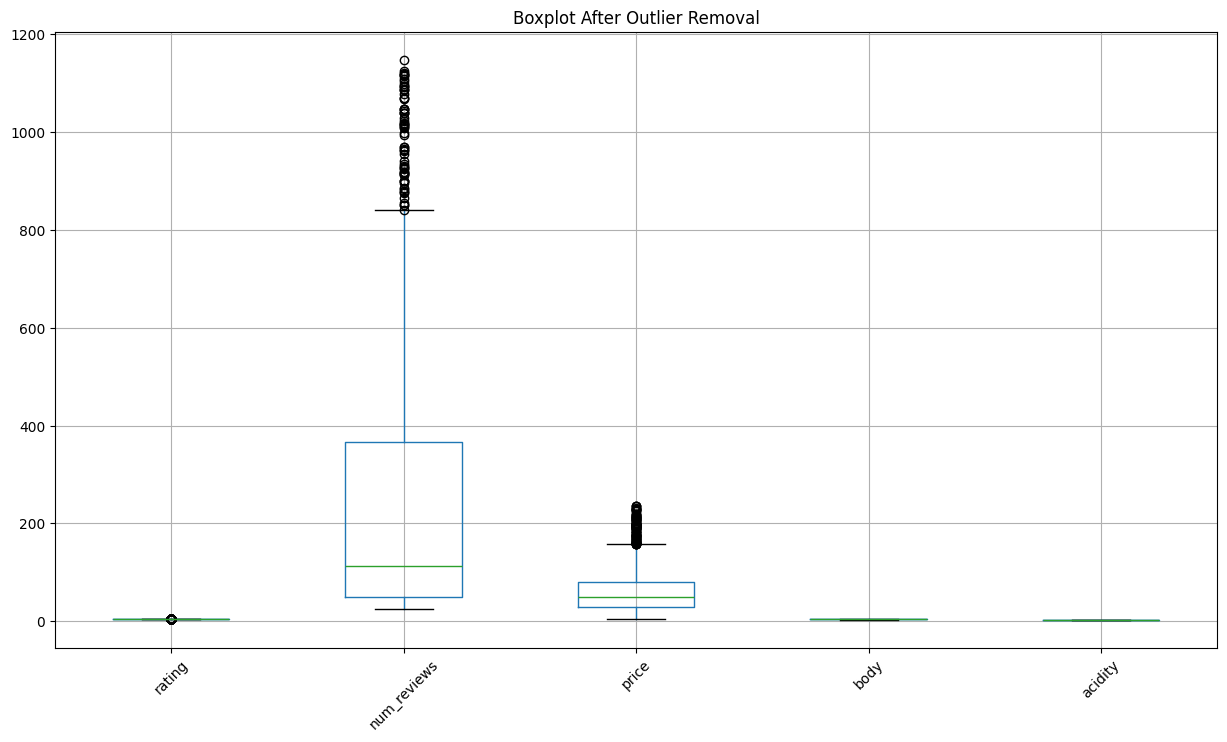

In [11]:
#VISUALISING
plt.figure(figsize=(15, 8))
df_cleaned[num_cols].boxplot(rot=45)
plt.title("Boxplot After Outlier Removal")
plt.show()
# TO ENSURE THAT EXTREME VALUES HAVE BEEN PRPERLY REMOVED

In [12]:
df_cleaned.to_csv('/content/wines_SPA_outliers_removed.csv', index=False)
print("Outlier-free dataset saved successfully!")


Outlier-free dataset saved successfully!
